#   Aim: Implement linear regression in Python on a given dataset.

In [117]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Simple linear Regression 

In [118]:
#data_no=pd.read_csv('Automobile.csv')
#df = pd.DataFrame()
d = pd.read_csv("Automobile.csv")

In [119]:
d

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8.0,307.0,130.0,3504.0,12.0,70,usa
1,buick skylark 320,15.0,8.0,350.0,165.0,3693.0,11.5,70,usa
2,plymouth satellite,18.0,8.0,318.0,150.0,3436.0,11.0,70,usa
3,amc rebel sst,16.0,8.0,304.0,150.0,3433.0,12.0,70,usa
4,ford torino,17.0,8.0,302.0,140.0,3449.0,10.5,70,usa
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4.0,140.0,86.0,2790.0,15.6,82,usa
394,vw pickup,44.0,4.0,97.0,52.0,2130.0,24.6,82,europe
395,dodge rampage,32.0,4.0,135.0,84.0,2295.0,11.6,82,usa
396,ford ranger,28.0,4.0,120.0,79.0,2625.0,18.6,82,usa


In [120]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           397 non-null    float64
 2   cylinders     397 non-null    float64
 3   displacement  393 non-null    float64
 4   horsepower    391 non-null    float64
 5   weight        393 non-null    float64
 6   acceleration  396 non-null    float64
 7   model_year    396 non-null    object 
 8   origin        397 non-null    object 
dtypes: float64(6), object(3)
memory usage: 28.1+ KB


In [121]:
d.isnull().sum()

name            0
mpg             1
cylinders       1
displacement    5
horsepower      7
weight          5
acceleration    2
model_year      2
origin          1
dtype: int64

In [122]:
X = d.iloc[:,3:4]
Y = d.iloc[:,4:5]

In [123]:
X=X.fillna(192.393130)
Y=Y.fillna(104.524297)

In [124]:
Y.shape

(398, 1)

In [125]:
X.shape


(398, 1)

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=2)

In [127]:
Y_test.shape

(160, 1)

In [128]:
X_test

,displacement
94,440.0
32,98.0
279,98.0
178,120.0
354,100.0
...,...
23,121.0
241,146.0
1,350.0
169,232.0


In [129]:
d.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration
count,397.000000,397.000000,393.000000,391.000000,393.000000,396.000000
mean,23.538539,5.458438,192.393130,104.524297,2949.053435,15.671970
std,7.811191,1.701577,103.205814,38.525101,851.576054,3.961926
min,9.000000,3.000000,68.000000,46.000000,15.000000,0.500000
25%,17.500000,4.000000,105.000000,75.000000,2220.000000,13.775000
50%,23.000000,4.000000,146.000000,94.000000,2790.000000,15.500000
75%,29.000000,8.000000,260.000000,127.000000,3570.000000,17.225000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,70.000000


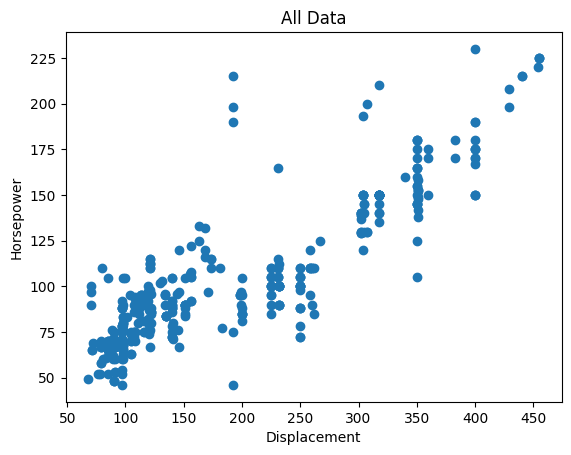

In [130]:
plt.scatter(X,Y)
 # naming the x axis   
plt.xlabel('Displacement')   
# naming the y axis   
plt.ylabel('Horsepower')   
# giving a title to graph   
plt.title('All Data')   
# function to show the plot   
plt.show()
#plotting X & Y data on graph

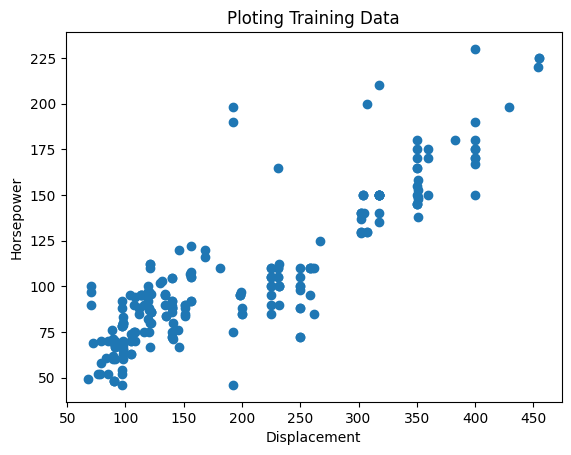

In [131]:
# naming the x axis   
plt.xlabel('Displacement')   
# naming the y axis   
plt.ylabel('Horsepower')   
# giving a title to graph   
plt.title('Ploting Training Data')     
#plotting X & Y data on graph
plt.scatter(X_train,Y_train)
plt.show()
#plotting training data on graph

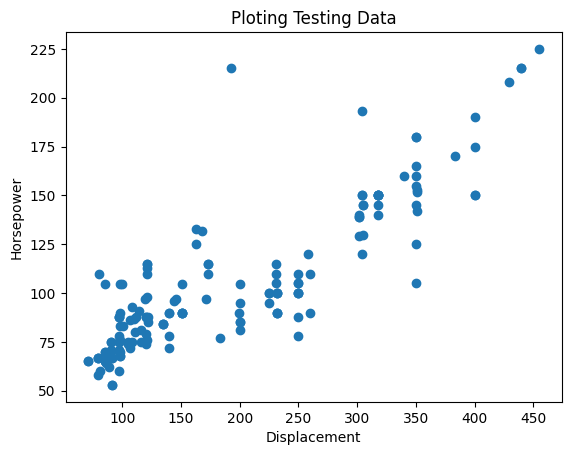

In [132]:
#plotting Testing data on graph

# naming the x axis   
plt.xlabel('Displacement')   
# naming the y axis   
plt.ylabel('Horsepower')   
# giving a title to graph   
plt.title('Ploting Testing Data')     
#plotting X & Y data on graph
plt.scatter(X_test,Y_test)
plt.show()


In [133]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(X_train,Y_train)

intercept=lr.intercept_
intercept

array([40.45473373])

In [134]:
coef=lr.coef_
coef

array([[0.33128207]])

In [135]:
Y_pred = lr.predict(X_test)

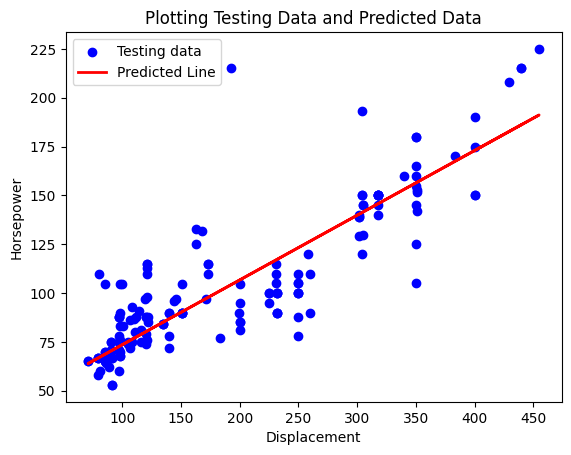

In [136]:
# Plotting the scatter plot
plt.scatter(X_test, Y_test, color='blue', label='Testing data')

# Plotting the regression line with predicted values
plt.plot(X_test, Y_pred, color='red', linewidth=2, label='Predicted Line')

plt.xlabel('Displacement')
plt.ylabel('Horsepower')
plt.title('Plotting Testing Data and Predicted Data')

plt.legend()

plt.show()


In [137]:
lr.score(X_train, Y_train)

0.7579028942658471

In [138]:
Y_pred=lr.predict(X_test)
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score
mean_absolute_error(Y_test, Y_pred)

13.070989131325026

In [139]:
mean_squared_error(Y_test, Y_pred)

367.74996277773056

In [140]:
root_mean_squared_error(Y_test, Y_pred)

19.176807940262908

In [141]:
r2=r2_score(Y_test, Y_pred)
r2

0.7345525423105541

In [142]:
n=398
k=1
adj_r2score = 1 - (((1-r2)*(10-n))/ (10-n-k))
print(adj_r2score)

0.7352349265205527


# Mutivalue linear Regression 

In [143]:
#data_no=pd.read_csv('Automobile.csv')
#df = pd.DataFrame()
M2 = pd.read_csv("Automobile.csv")

In [144]:
M2.isnull().sum()

name            0
mpg             1
cylinders       1
displacement    5
horsepower      7
weight          5
acceleration    2
model_year      2
origin          1
dtype: int64

In [145]:
d.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration
count,397.000000,397.000000,393.000000,391.000000,393.000000,396.000000
mean,23.538539,5.458438,192.393130,104.524297,2949.053435,15.671970
std,7.811191,1.701577,103.205814,38.525101,851.576054,3.961926
min,9.000000,3.000000,68.000000,46.000000,15.000000,0.500000
25%,17.500000,4.000000,105.000000,75.000000,2220.000000,13.775000
50%,23.000000,4.000000,146.000000,94.000000,2790.000000,15.500000
75%,29.000000,8.000000,260.000000,127.000000,3570.000000,17.225000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,70.000000


In [146]:
X = M2.iloc[:,2:4]
Y = M2.iloc[:,4:5]

In [147]:
X.isnull().sum()

cylinders       1
displacement    5
dtype: int64

In [148]:
Y.isnull().sum()

horsepower    7
dtype: int64

In [149]:
# Replace null values in the 'cylinders' column with a specific value
X['cylinders'] = X['cylinders'].fillna(value=5.458438)

# Replace null values in the 'displacement' column with a different value
X['displacement'] = X['displacement'].fillna(value=192.393130)

Y=Y.fillna(104.524297)

In [150]:
X.isnull().sum()

cylinders       0
displacement    0
dtype: int64

In [151]:
X.shape

(398, 2)

In [152]:
Y.shape

(398, 1)

In [153]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=2)

In [154]:
Y_test.shape

(160, 1)

In [155]:
X_test.shape

(160, 2)

In [156]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(X_train,Y_train)

intercept=lr.intercept_
intercept

array([28.39757549])

In [157]:
coef_cylinders, coef_displacement = lr.coef_[0]
print(coef_cylinders, coef_displacement)

4.982040075188673 0.25333950531970395


In [158]:
coef=lr.coef_
coef

array([[4.98204008, 0.25333951]])

In [159]:
Y_pred = lr.predict(X_test)

In [160]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 
import numpy as np 

In [161]:
# Creating a meshgrid for the plane
x_values = np.linspace(min(X["cylinders"]), max(X["cylinders"]), 10)
y_values = np.linspace(min(X["displacement"]), max(X["displacement"]), 10)
x_mesh, y_mesh = np.meshgrid(x_values, y_values)

In [162]:
# Calculating z values for the plane using the plane equation
z_mesh = coef_cylinders * x_mesh + coef_displacement * y_mesh + intercept

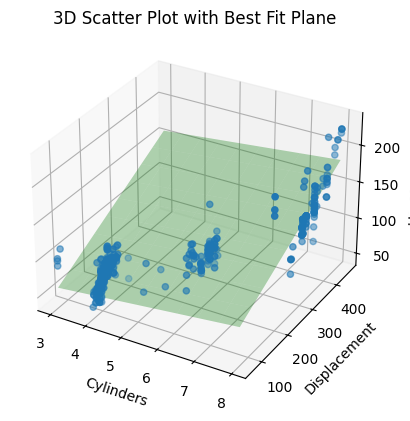

In [163]:
 # Plotting the scatter plot
 fig = plt.figure()
 ax = fig.add_subplot(projection='3d')
 ax.scatter(X["cylinders"], X["displacement"], Y)
 # Plotting the best fit plane
 ax.plot_surface(x_mesh, y_mesh, z_mesh, alpha = 0.3, color='green')
 ax.set_xlabel('Cylinders')
 ax.set_ylabel('Displacement')
 ax.set_zlabel('Horsepower')
 ax.set_title('3D Scatter Plot with Best Fit Plane')
# ax.legend()
 plt.show()

In [164]:
Y_pred=lr.predict(X_test)
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score
mean_absolute_error(Y_test, Y_pred)

13.34665612540907

In [165]:
mean_squared_error(Y_test, Y_pred)

363.8637958562596

In [166]:
root_mean_squared_error(Y_test, Y_pred)

19.075214175894846

In [167]:
r2=r2_score(Y_test, Y_pred)
r2

0.7373576360804337

In [168]:
Y_test.shape

(160, 1)

In [169]:
n=160
k=2
adj_r2score = 1 - (((1-r2)*(10-n))/ (10-n-k))
print(adj_r2score)

0.7408134566583227


# More than 2 Mutivalue linear Regression

In [170]:
#data_no=pd.read_csv('Automobile.csv')
#M4 = pd.DataFrame()
M4 = pd.read_csv("Automobile.csv")

In [171]:
M4

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8.0,307.0,130.0,3504.0,12.0,70,usa
1,buick skylark 320,15.0,8.0,350.0,165.0,3693.0,11.5,70,usa
2,plymouth satellite,18.0,8.0,318.0,150.0,3436.0,11.0,70,usa
3,amc rebel sst,16.0,8.0,304.0,150.0,3433.0,12.0,70,usa
4,ford torino,17.0,8.0,302.0,140.0,3449.0,10.5,70,usa
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4.0,140.0,86.0,2790.0,15.6,82,usa
394,vw pickup,44.0,4.0,97.0,52.0,2130.0,24.6,82,europe
395,dodge rampage,32.0,4.0,135.0,84.0,2295.0,11.6,82,usa
396,ford ranger,28.0,4.0,120.0,79.0,2625.0,18.6,82,usa


In [172]:
M4.isnull().sum()

name            0
mpg             1
cylinders       1
displacement    5
horsepower      7
weight          5
acceleration    2
model_year      2
origin          1
dtype: int64

In [173]:
M4.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration
count,397.000000,397.000000,393.000000,391.000000,393.000000,396.000000
mean,23.538539,5.458438,192.393130,104.524297,2949.053435,15.671970
std,7.811191,1.701577,103.205814,38.525101,851.576054,3.961926
min,9.000000,3.000000,68.000000,46.000000,15.000000,0.500000
25%,17.500000,4.000000,105.000000,75.000000,2220.000000,13.775000
50%,23.000000,4.000000,146.000000,94.000000,2790.000000,15.500000
75%,29.000000,8.000000,260.000000,127.000000,3570.000000,17.225000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,70.000000


In [174]:
M4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           397 non-null    float64
 2   cylinders     397 non-null    float64
 3   displacement  393 non-null    float64
 4   horsepower    391 non-null    float64
 5   weight        393 non-null    float64
 6   acceleration  396 non-null    float64
 7   model_year    396 non-null    object 
 8   origin        397 non-null    object 
dtypes: float64(6), object(3)
memory usage: 28.1+ KB


In [175]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [176]:
# new_Crash_data=pd.DataFrame()
M4['name'] = encoder.fit_transform(M4['name'])
# new_Crash_data=pd.DataFrame()
M4['model_year'] = encoder.fit_transform(M4['model_year'])
# new_Crash_data=pd.DataFrame()
M4['origin'] = encoder.fit_transform(M4['origin'])

In [177]:
M4

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,49,18.0,8.0,307.0,130.0,3504.0,12.0,0,2
1,36,15.0,8.0,350.0,165.0,3693.0,11.5,0,2
2,231,18.0,8.0,318.0,150.0,3436.0,11.0,0,2
3,14,16.0,8.0,304.0,150.0,3433.0,12.0,0,2
4,161,17.0,8.0,302.0,140.0,3449.0,10.5,0,2
...,...,...,...,...,...,...,...,...,...
393,153,27.0,4.0,140.0,86.0,2790.0,15.6,12,2
394,301,44.0,4.0,97.0,52.0,2130.0,24.6,12,0
395,119,32.0,4.0,135.0,84.0,2295.0,11.6,12,2
396,159,28.0,4.0,120.0,79.0,2625.0,18.6,12,2


In [178]:
import pandas as pd

X = pd.concat([M4.iloc[:,0:4], M4.iloc[:,5:9]], axis=1)


In [179]:
M4.isnull().sum()

name            0
mpg             1
cylinders       1
displacement    5
horsepower      7
weight          5
acceleration    2
model_year      0
origin          0
dtype: int64

In [180]:
X

,name,mpg,cylinders,displacement,weight,acceleration,model_year,origin
0,49,18.0,8.0,307.0,3504.0,12.0,0,2
1,36,15.0,8.0,350.0,3693.0,11.5,0,2
2,231,18.0,8.0,318.0,3436.0,11.0,0,2
3,14,16.0,8.0,304.0,3433.0,12.0,0,2
4,161,17.0,8.0,302.0,3449.0,10.5,0,2
...,...,...,...,...,...,...,...,...
393,153,27.0,4.0,140.0,2790.0,15.6,12,2
394,301,44.0,4.0,97.0,2130.0,24.6,12,0
395,119,32.0,4.0,135.0,2295.0,11.6,12,2
396,159,28.0,4.0,120.0,2625.0,18.6,12,2


In [181]:
X.describe()

,name,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,397.000000,397.000000,393.000000,393.000000,396.000000,398.000000,398.000000
mean,148.550251,23.538539,5.458438,192.393130,2949.053435,15.671970,6.100503,1.452261
std,89.495880,7.811191,1.701577,103.205814,851.576054,3.961926,3.731539,0.778478
min,0.000000,9.000000,3.000000,68.000000,15.000000,0.500000,0.000000,0.000000
25%,65.250000,17.500000,4.000000,105.000000,2220.000000,13.775000,3.000000,1.000000
50%,150.000000,23.000000,4.000000,146.000000,2790.000000,15.500000,6.000000,2.000000
75%,225.750000,29.000000,8.000000,260.000000,3570.000000,17.225000,9.000000,2.000000
max,304.000000,46.600000,8.000000,455.000000,5140.000000,70.000000,14.000000,3.000000


In [182]:

X['mpg'] = X['mpg'].fillna(value=23.538539)
# Replace null values in the 'cylinders' column with a specific value
X['cylinders'] = X['cylinders'].fillna(value=5.458438)

# Replace null values in the 'displacement' column with a different value
X['displacement'] = X['displacement'].fillna(value=192.393130)

X['weight'] = X['weight'].fillna(value=192.393130)

X['acceleration'] = X['acceleration'].fillna(value=192.393130)

Y=Y.fillna(104.524297)

In [183]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=2)

In [184]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(X_train,Y_train)

intercept=lr.intercept_
intercept

array([64.13840453])

In [185]:
coef=lr.coef_
coef

array([[-0.01040342, -0.91356548,  2.70751266,  0.18423884,  0.00718577,
        -0.10747737, -0.361584  , -2.82215043]])

In [186]:
coef_name, coef_mpg, coef_cylinders, coef_displacement, coef_weight, coef_acceleration, coef_model_year, coef_origin = lr.coef_[0]
print(coef_mpg, coef_cylinders, coef_displacement)

-0.9135654830247643 2.707512656282228 0.18423883622165788


In [187]:
Y_pred = lr.predict(X_test)


In [188]:
Y_pred=lr.predict(X_test)
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score
mean_absolute_error(Y_test, Y_pred)

13.295338700617416

In [189]:
mean_squared_error(Y_test, Y_pred)

341.332185874115

In [190]:
root_mean_squared_error(Y_test, Y_pred)

18.475177560015897

In [191]:
r2=r2_score(Y_test, Y_pred)
r2

0.7536212912613462

In [192]:
n=160
k=3
adj_r2score = 1 - (((1-r2)*(10-n))/ (10-n-k))
print(adj_r2score)

0.7584522463346531


# Removing origin column

In [193]:
# column_to_drop = "origin"
X = X.drop('origin', axis=1)

In [194]:
X

,name,mpg,cylinders,displacement,weight,acceleration,model_year
0,49,18.0,8.0,307.0,3504.0,12.0,0
1,36,15.0,8.0,350.0,3693.0,11.5,0
2,231,18.0,8.0,318.0,3436.0,11.0,0
3,14,16.0,8.0,304.0,3433.0,12.0,0
4,161,17.0,8.0,302.0,3449.0,10.5,0
...,...,...,...,...,...,...,...
393,153,27.0,4.0,140.0,2790.0,15.6,12
394,301,44.0,4.0,97.0,2130.0,24.6,12
395,119,32.0,4.0,135.0,2295.0,11.6,12
396,159,28.0,4.0,120.0,2625.0,18.6,12


In [195]:

X['mpg'] = X['mpg'].fillna(value=23.538539)
# Replace null values in the 'cylinders' column with a specific value
X['cylinders'] = X['cylinders'].fillna(value=5.458438)

# Replace null values in the 'displacement' column with a different value
X['displacement'] = X['displacement'].fillna(value=192.393130)

X['weight'] = X['weight'].fillna(value=192.393130)

X['acceleration'] = X['acceleration'].fillna(value=192.393130)

Y=Y.fillna(104.524297)

In [196]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=2)

In [197]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(X_train,Y_train)

intercept=lr.intercept_
intercept

array([58.6808647])

In [198]:
coef=lr.coef_
coef

array([[-0.00420697, -0.84155477,  2.78998424,  0.17328983,  0.0075213 ,
        -0.10418774, -0.48523644]])

In [199]:
coef_name, coef_mpg, coef_cylinders, coef_displacement, coef_weight, coef_acceleration, coef_model_year = lr.coef_[0]
print(coef_mpg, coef_cylinders, coef_displacement)

-0.8415547657354356 2.7899842356934568 0.17328982724531156


In [200]:
Y_pred = lr.predict(X_test)


In [201]:
Y_pred=lr.predict(X_test)
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score
mean_absolute_error(Y_test, Y_pred)

13.35629564001081

In [202]:
r2=r2_score(Y_test, Y_pred)
r2

0.7464578917754212

# Removing Acceleration Column

In [203]:
# column_to_drop = "origin"
X = X.drop('acceleration', axis=1)

In [204]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=2)

In [205]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(X_train,Y_train)


LinearRegression()

In [208]:
Y_pred = lr.predict(X_test)

In [209]:
Y_pred=lr.predict(X_test)
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score
mean_absolute_error(Y_test, Y_pred)
r2=r2_score(Y_test, Y_pred)
r2

0.7420533440568693